# **КУРСОВАЯ РАБОТА**

### Датасет [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

Признаки

1. **customerID**: идентификатор клиента.

2. **gender**: пол клиента (женский/мужской).

3. **SeniorCitizen**: является ли клиент пожилым (1 - да, 0 - нет).

4. **Partner**: наличие партнера (супруга/супруги) (Yes/No).

5. **Dependents**: есть ли иждивенцы (дети, родители) (Yes/No).

6. **tenure**: количество месяцев, в течение которых клиент оставался в компании.

7. **PhoneService**: наличие телефонной услуги (Yes/No).

8. **MultipleLines**: наличие нескольких линий (Yes/No/No phone service).

9. **InternetService**: тип интернет-услуги (DSL, Fiber optic, No).

10. **OnlineSecurity**: наличие услуги онлайн-безопасности (Yes/No/No internet service).

11. **OnlineBackup**: наличие услуги онлайн-резервного копирования (Yes/No/No internet service).

12. **DeviceProtection**: наличие услуги защиты устройства (Yes/No/No internet service).

13. **TechSupport**: наличие услуги технической поддержки (Yes/No/No internet service).

14. **StreamingTV**: наличие услуги потокового телевидения (Yes/No/No internet service).

15. **StreamingMovies**: наличие услуги потокового кино (Yes/No/No internet service).

16. **Contract**: тип контракта (Month-to-month, One year, Two year).

17. **PaperlessBilling**: использование безбумажного биллинга (Yes/No).

18. **PaymentMethod**: метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

19. **MonthlyCharges**: ежемесячные расходы клиента.

20. **TotalCharges**: общая сумма, потраченная клиентом за все время.

Целевая переменная **Churn** - отток (Yes/No).

### Установка и импорт необходимых библиотек

In [ ]:
!pip install -q lime shap

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency, gaussian_kde

import xgboost as xgb
import shap
import lime
import lime.lime_tabular

import warnings
warnings.filterwarnings("ignore")

from IPython.display import HTML

## Анализ и предобработка данных

In [ ]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [ ]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Предобработка данных
1. Удаление столбца **customerID**.
2. Удаление строк с пропущенными значениями.
3. Label encoding столбца целевой переменной **Churn**.
4. Добавление двух признаков:

    1) Средние траты в месяц **AvgCharges** (всего потрачено долларов/месяцы, обслуживаемые у данного провайдера);

    2) Число сервисов **NumServices** (число подключенных сервисов у клиента).

In [ ]:
df.drop(columns=['customerID'], inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', np.nan), errors='coerce')
df.dropna(inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

# Feature Engineering
df["AvgCharges"] = df["TotalCharges"] / (df["tenure"] + 1)
df["NumServices"] = df[["PhoneService", "OnlineSecurity", "OnlineBackup",
                         "DeviceProtection", "TechSupport",
                         "StreamingTV", "StreamingMovies"]].apply(lambda x: x.eq("Yes").sum(), axis=1)


df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  AvgCharges  \
0           Electronic check          29.85        29.85      0   14.925000   
1               Mailed check          56.95      1889.50      0   53.985714   
2               Mailed check          53.85       108.15      1   36.050000   
3  Bank transfer (automatic)          42.30      1840.75      0   40.016304   
4           Electronic check          70.70       151.65      1   50.550000   

   NumServices  
0            1  
1            3  
2            3  
3            3  
4            1  

[5 rows x 22 columns]

Визуализируем распределение целевой переменной **Churn** по классам

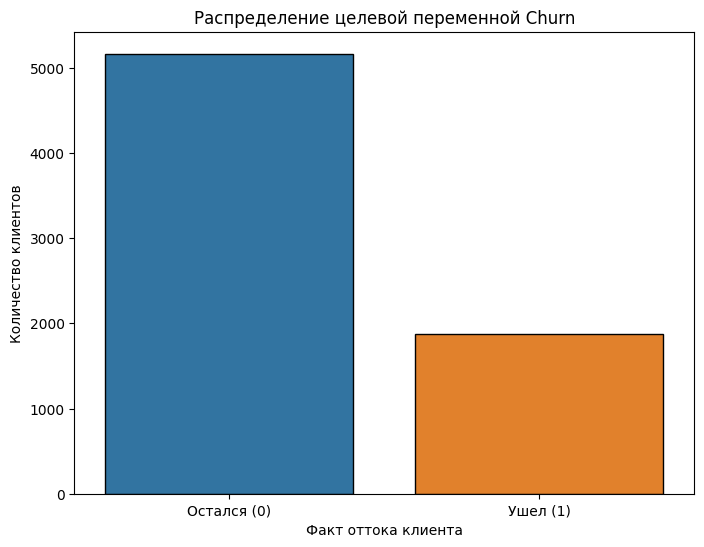

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(
    x='Churn',
    data=df,
    hue='Churn',
    palette={0: '#1f77b4', 1: '#ff7f0e'},
    legend=False,
    edgecolor='black'
)
plt.title('Распределение целевой переменной Churn')
plt.xlabel('Факт оттока клиента')
plt.ylabel('Количество клиентов')
plt.xticks([0, 1], ['Остался (0)', 'Ушел (1)'])
plt.show()

Видно, что количество оставшихся клиентов преобладает на ушедшими, это надо будет учесть при обучении модели

Посмотрим на распределение клиентов по месяцам

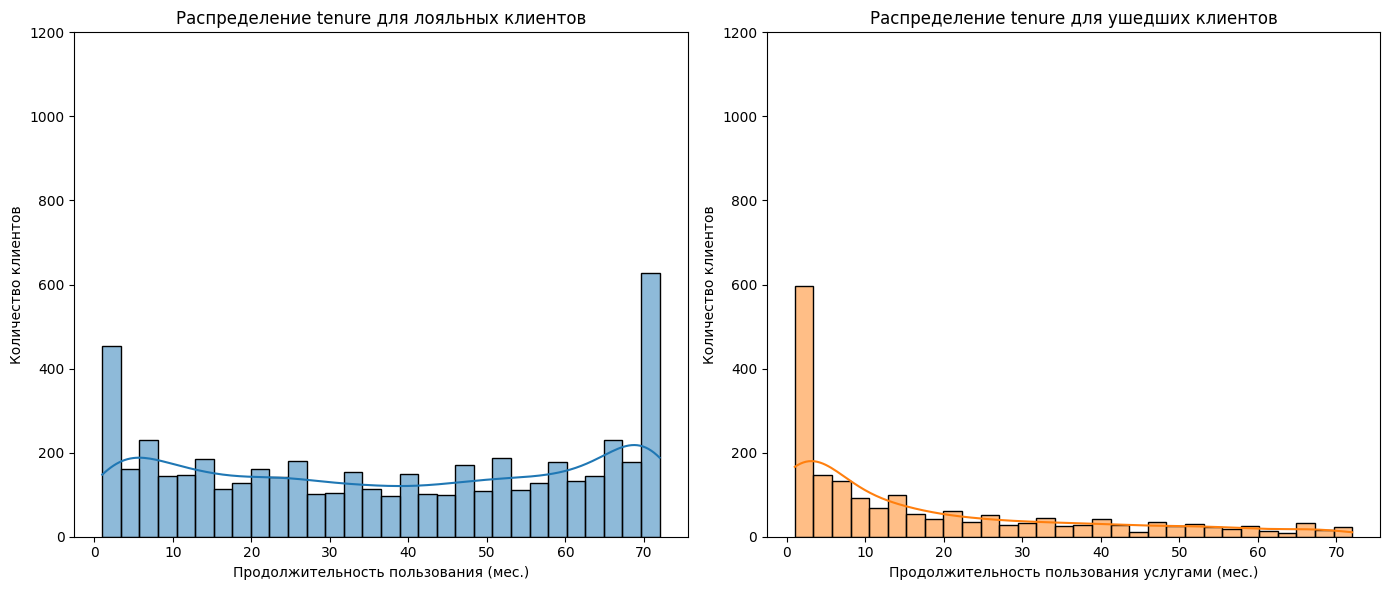

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[df['Churn'] == 0]['tenure'],
             bins=30,
             kde=True,
             color='#1f77b4',
             edgecolor='black')
plt.title('Распределение tenure для лояльных клиентов')
plt.xlabel('Продолжительность пользования (мес.)')
plt.ylabel('Количество клиентов')
plt.ylim(0, 1200)

plt.subplot(1, 2, 2)
sns.histplot(df[df['Churn'] == 1]['tenure'],
             bins=30,
             kde=True,
             color='#ff7f0e',
             edgecolor='black')
plt.title('Распределение tenure для ушедших клиентов')
plt.xlabel('Продолжительность пользования услугами (мес.)')
plt.ylabel('Количество клиентов')
plt.ylim(0, 1200)

plt.tight_layout()
plt.show()

По графикам видно, что основная часть клиентов уходит в начале, они как бы тестируют для себя новые тарифы, и принимают решение, оставаться ли им у данного провайдера, или уходить к другому. После первого месяца идет равномерный спад недовольных клиентов

Посмотрим на распределение ежемесячных затрат

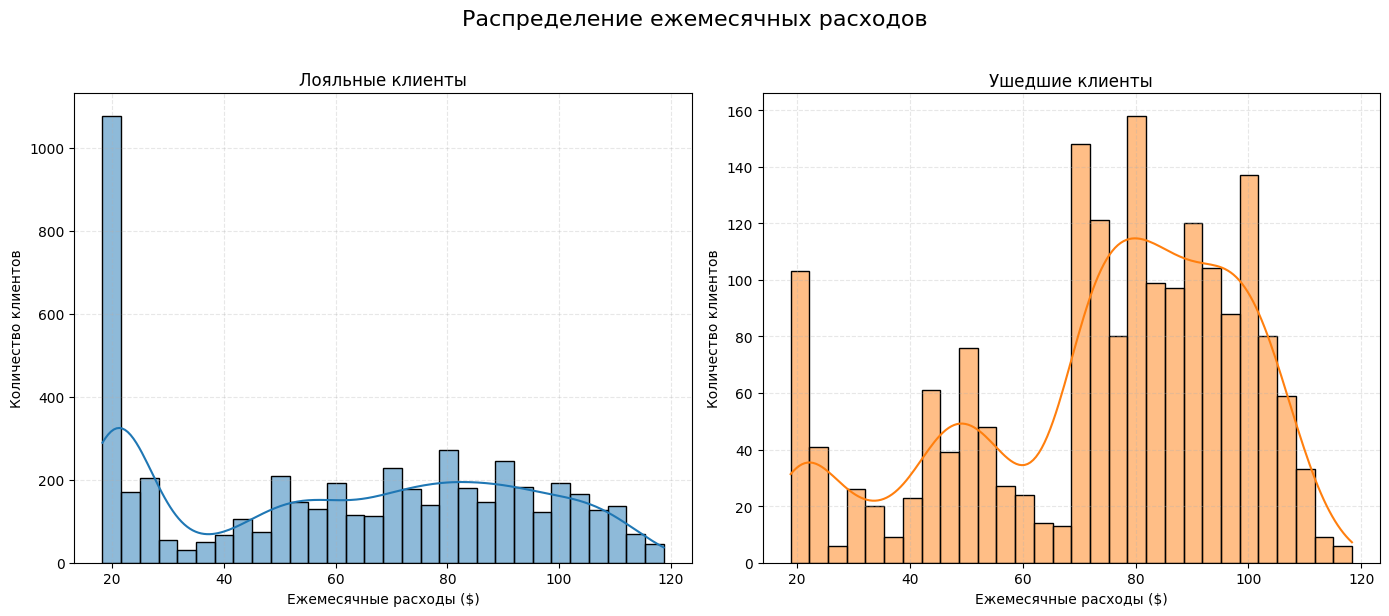

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df[df['Churn'] == 0],
             x='MonthlyCharges',
             bins=30,
             kde=True,
             color='#1f77b4',
             edgecolor='black')
plt.title('Лояльные клиенты')
plt.xlabel('Ежемесячные расходы ($)')
plt.ylabel('Количество клиентов')
plt.grid(True, linestyle='--', alpha=0.3)

plt.subplot(1, 2, 2)
sns.histplot(data=df[df['Churn'] == 1],
             x='MonthlyCharges',
             bins=30,
             kde=True,
             color='#ff7f0e',
             edgecolor='black')
plt.title('Ушедшие клиенты')
plt.xlabel('Ежемесячные расходы ($)')
plt.ylabel('Количество клиентов')
plt.grid(True, linestyle='--', alpha=0.3)

plt.suptitle('Распределение ежемесячных расходов', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

По графикам можно заметить, что чаще уходят те клиенты, которые платят большие деньги (больше 60-70$ в месяц)

Альтернитвный график оттока клиентов в зависимости от их затрат

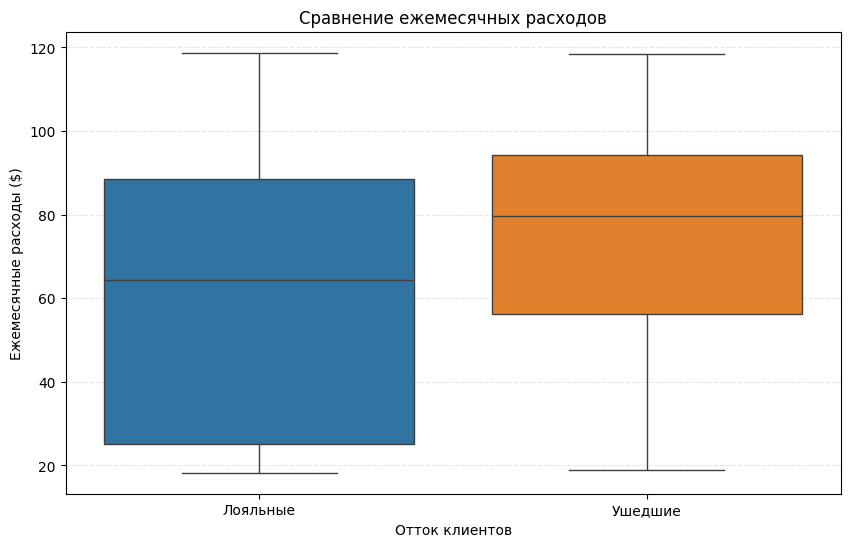

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Churn',
    y='MonthlyCharges',
    hue='Churn',
    palette=['#1f77b4', '#ff7f0e'],
    showfliers=False,
    legend=False
)

plt.title('Сравнение ежемесячных расходов')
plt.xlabel('Отток клиентов')
plt.ylabel('Ежемесячные расходы ($)')
plt.xticks([0, 1], ['Лояльные', 'Ушедшие'])
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

plt.show()

Этот код выполняет визуализацию и статистический анализ категориальных переменных, исследуя их связь с целевой переменной **Churn**. Для оценки связи категориальных переменных испольуется Cramer's V

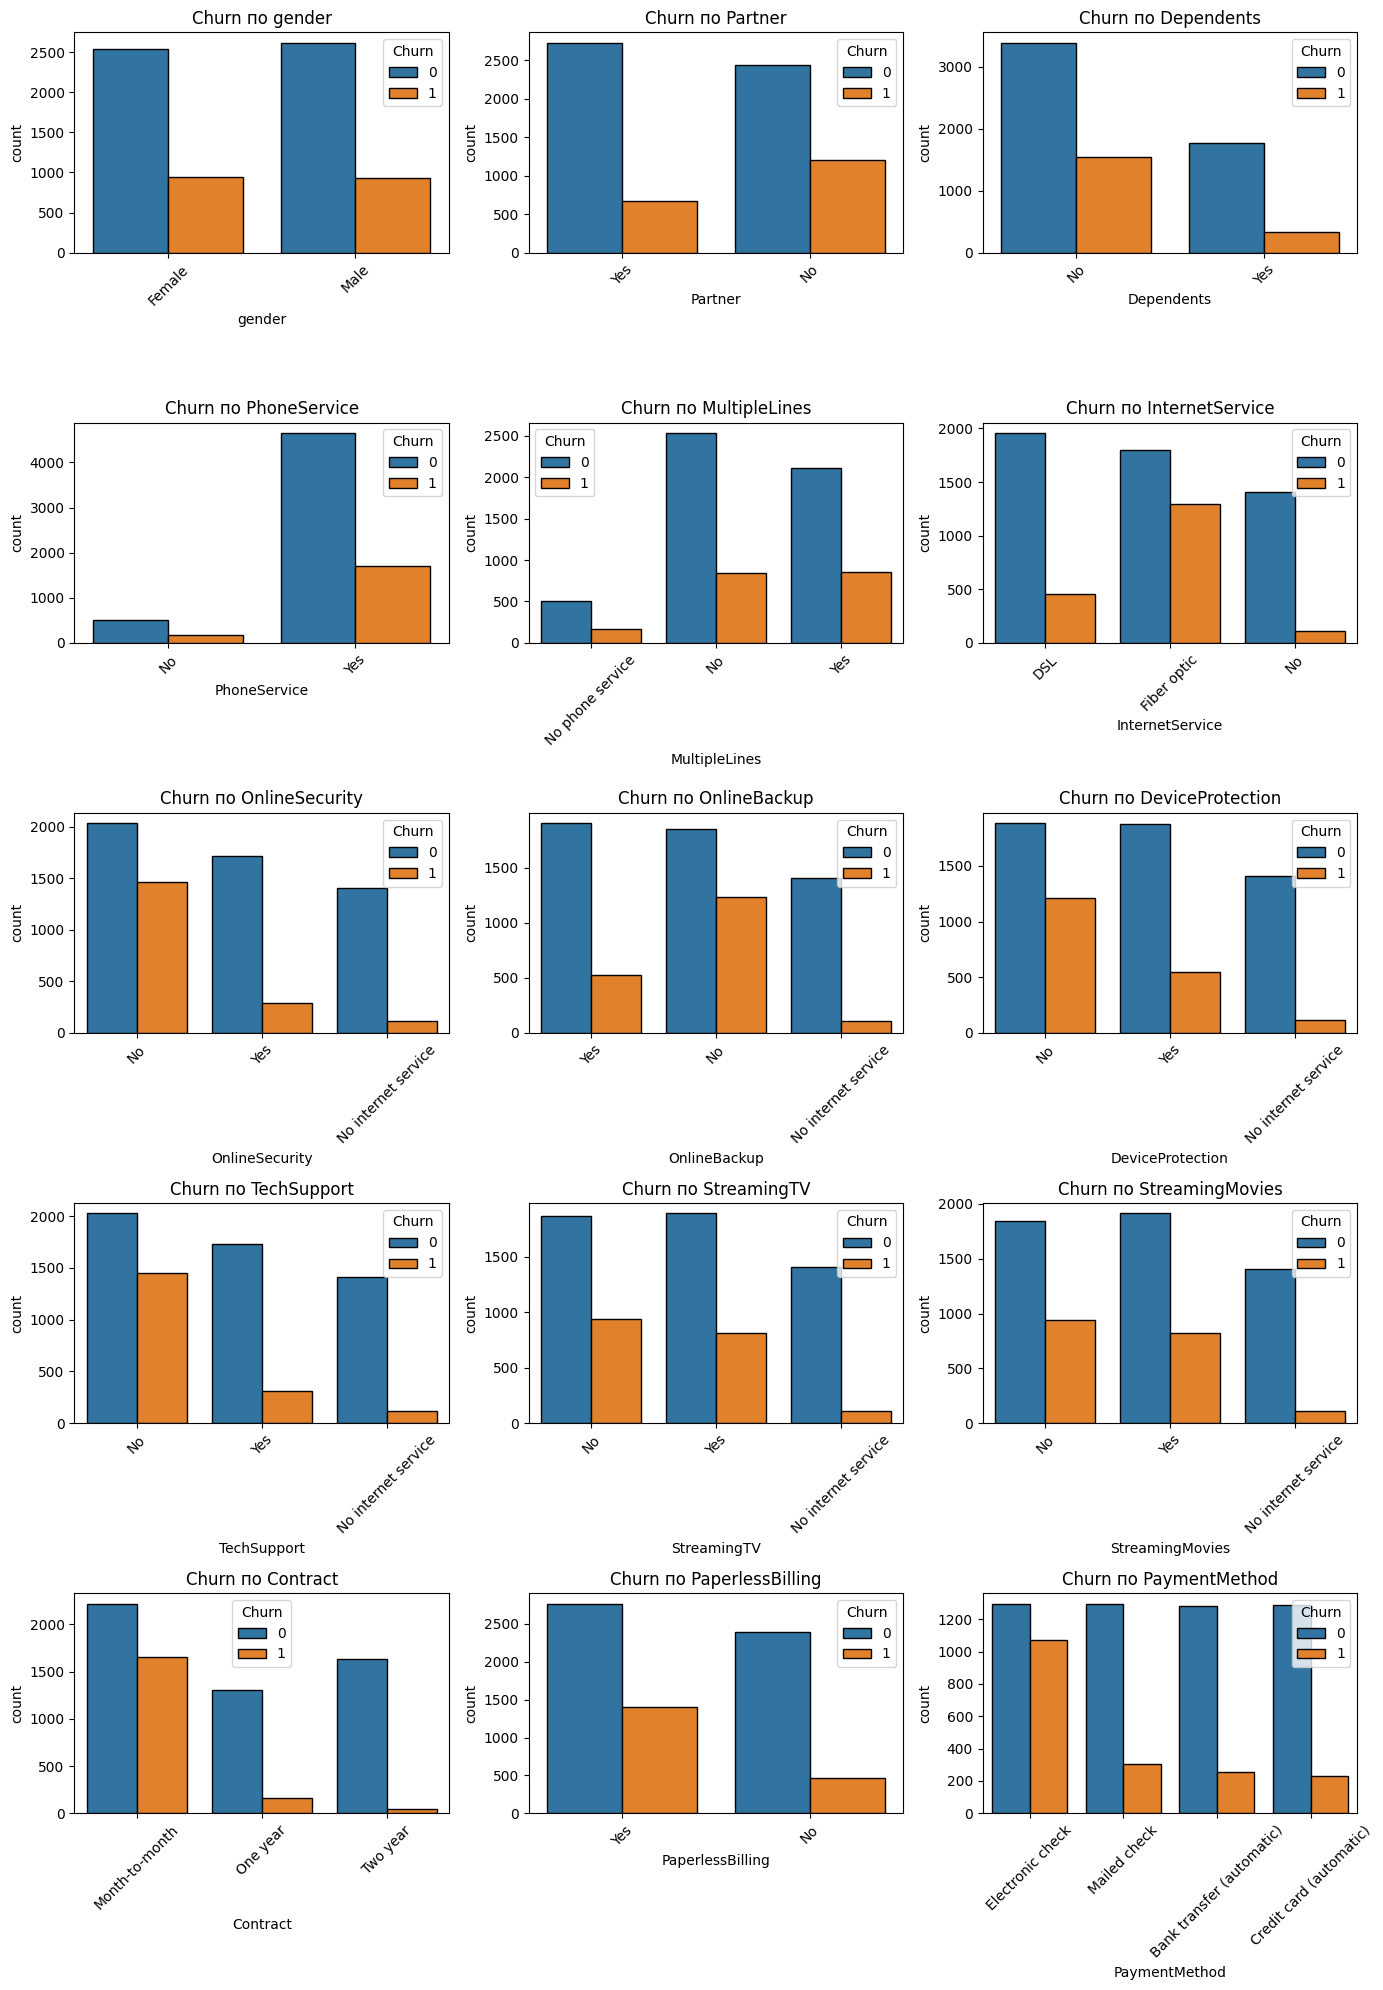

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
cramer_v_values = {}

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(14, 4 * n_rows))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(
        x=col,
        hue='Churn',
        data=df,
        palette={0: '#1f77b4', 1: '#ff7f0e'},
        edgecolor='black'
    )
    plt.title(f'Churn по {col}')
    plt.xticks(rotation=45)

    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    cramer_v_values[col] = cramers_v

plt.tight_layout()
plt.show()

По графикам можно сделать ряд выводов:
1. Чаще уходят клиенты без онлайн сервисов, что логично, поскольку клиент должен удостовериться, что ему подходит компания, и лишь после этого подключать доп. услуги.
2. Чаще уходят клиенты с помесячными тарифам, что тоже можно обосновать тем, что клиент сначала тестирует тарифы на которотком периоде, прежде чем оплачивать годовую подписку или больше.
3. Чаще уходят клиенты с формой оплаты электронным чеком, вероятно, на которотких периодах люди оплачивают тарифы вручную, и лишь после перехода на другие тарифы лояльные клиенты будут автоматизировать оплату.


Посмотрим на отток клиентов в зависимости от суммарного числа онлайн сервисов

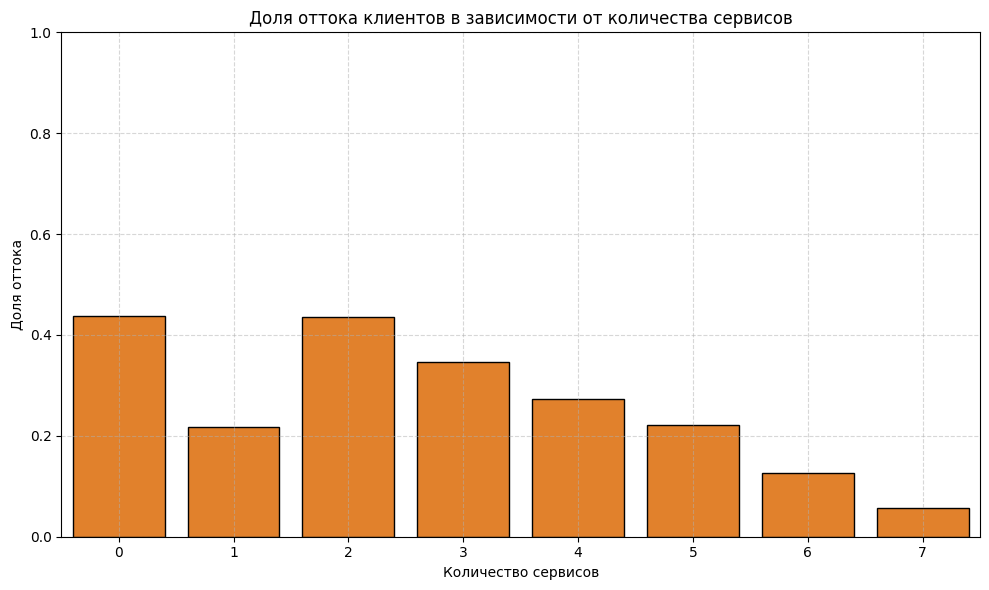

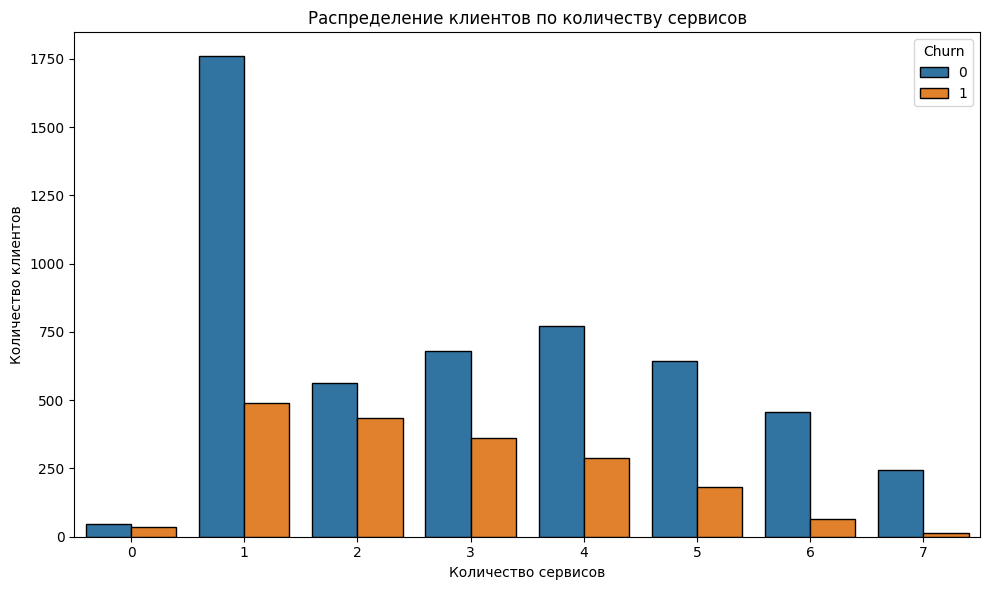

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='NumServices',
    y='Churn',
    data=df,
    estimator=np.mean,
    ci=None,
    color='#ff7f0e',
    edgecolor='black'
)
plt.title("Доля оттока клиентов в зависимости от количества сервисов")
plt.xlabel("Количество сервисов")
plt.ylabel("Доля оттока")
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(
    x='NumServices',
    hue='Churn',
    data=df,
    palette={0: '#1f77b4', 1: '#ff7f0e'},
    edgecolor='black'
)
plt.title("Распределение клиентов по количеству сервисов")
plt.xlabel("Количество сервисов")
plt.ylabel("Количество клиентов")
plt.tight_layout()
plt.show()

Видим, что у большинства клиентов есть хотя бы 1 подключенный сервис, и абсолютное число уходящих клиентов равномерно снижается с увеличением числа сервисов.

Построим корреляционную матрицу для числовых признаков

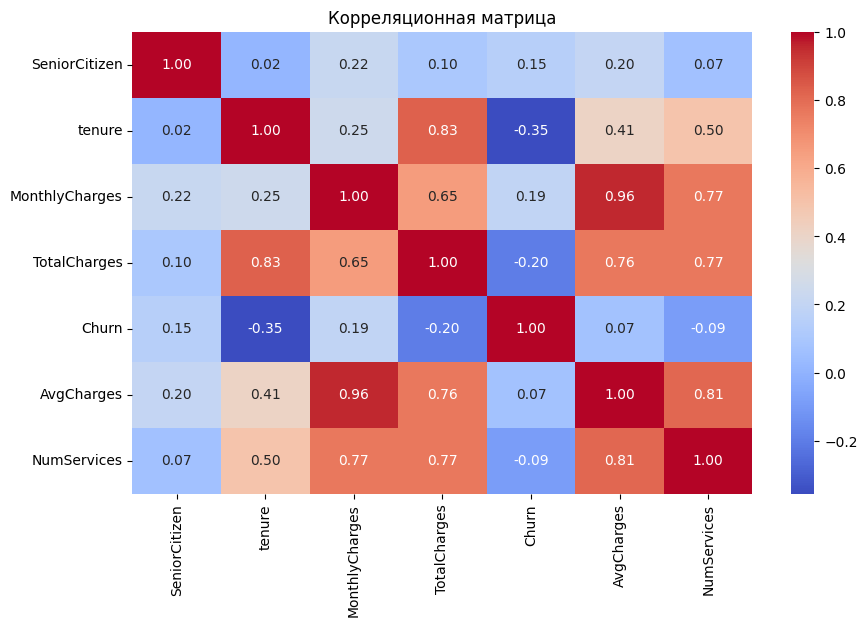

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

Видим, что добавленный мной признак **AvgCharges** не оправдался - он имеет сильную корреляцию с **MonthlyCharges**. Это говорит о том, что клиенты в целом платят одинаково каждый месяц и не склонны резко увеличивать свои расходы. Удалим признак **AvgCharges**

In [ ]:
df.drop(columns=['AvgCharges'], inplace=True)

Визуализируем горизонтальный барплот для оценки корреляции категориальных признаков с целевой переменной **Churn**

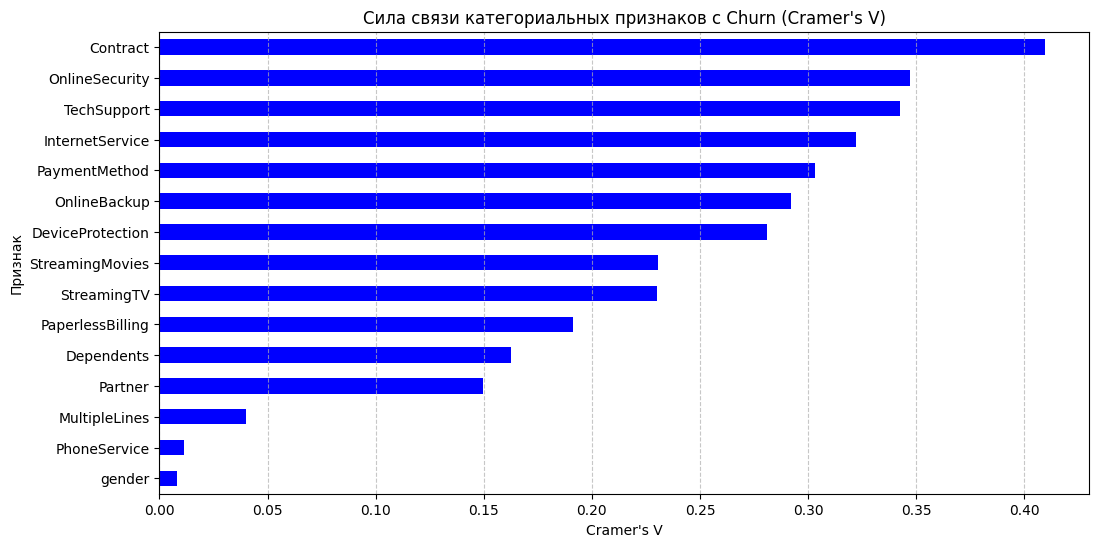

In [ ]:
plt.figure(figsize=(12, 6))
pd.Series(cramer_v_values).sort_values().plot(kind='barh', color='blue')
plt.title('Сила связи категориальных признаков с Churn (Cramer\'s V)')
plt.xlabel('Cramer\'s V')
plt.ylabel('Признак')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Мы можем увидеть, что наибольшие связи с целевой переменной имеют тариф (**Contract**) и наличие отдельных подключенных онлайн сервисов, а также способ оплаты. Удалим слабые признаки

In [ ]:
weak_features = [col for col, v in cramer_v_values.items() if v < 0.1]
print(f"Удаление слабых признаков: {weak_features}")
df.drop(weak_features, axis=1, inplace=True)

Удаление слабых признаков: ['gender', 'PhoneService', 'MultipleLines']


Применим One-hot encoding для категориальных переменных для дальнейшего обучения

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Посмотрим, как выглядит итоговый предобработанный датасет

In [ ]:
df

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  NumServices  \
0                 0       1           29.85         29.85      0            1   
1                 0      34           56.95       1889.50      0            3   
2                 0       2           53.85        108.15      1            3   
3                 0      45           42.30       1840.75      0            3   
4                 0       2           70.70        151.65      1            1   
...             ...     ...             ...           ...    ...          ...   
7038              0      24           84.80       1990.50      0            6   
7039              0      72          103.20       7362.90      0            5   
7040              0      11           29.60        346.45      0            1   
7041              1       4           74.40        306.60      1            1   
7042              0      66          105.65       6844.50      0            6   

      Partner_Yes  Dependents_Yes  InternetService_Fiber optic  \
0            True           False                        False   
1           False           False                        False   
2           False           False                        False   
3           False           False                        False   
4           False           False                         True   
...           ...             ...                          ...   
7038         True            True                        False   
7039         True            True                         True   
7040         True            True                        False   
7041         True           False                         True   
7042        False           False                         True   

      InternetService_No  ...  StreamingTV_No internet service  \
0                  False  ...                            False   
1                  False  ...                            False   
2                  False  ...                            False   
3                  False  ...                            False   
4                  False  ...                            False   
...                  ...  ...                              ...   
7038               False  ...                            False   
7039               False  ...                            False   
7040               False  ...                            False   
7041               False  ...                            False   
7042               False  ...                            False   

      StreamingTV_Yes  StreamingMovies_No internet service  \
0               False                                False   
1               False                                False   
2               False                                False   
3               False                                False   
4               False                                False   
...               ...                                  ...   
7038             True                                False   
7039             True                                False   
7040            False                                False   
7041            False                                False   
7042             True                                False   

      StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                   False              False              False   
1                   False               True              False   
2                   False              False              False   
3                   False               True              False   
4                   False              False              False   
...                   ...                ...                ...   
7038                 True               True              False   
7039                 True               True              False   
7040                False              False              False   
7041                False       

## Подготовка данных для обучения и обучение

Разделение данных

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Преобразование числовых признаков **tenure**, **MonthlyCharges** и **TotalCharges**

In [ ]:
high_value_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
qt = QuantileTransformer(output_distribution='normal')
X_train[high_value_cols] = qt.fit_transform(X_train[high_value_cols])
X_test[high_value_cols] = qt.transform(X_test[high_value_cols])

Стандартизируем остальные признаки

In [ ]:
scaler = StandardScaler()
other_cols = [col for col in X_train.columns if col not in high_value_cols]
X_train[other_cols] = scaler.fit_transform(X_train[other_cols])
X_test[other_cols] = scaler.transform(X_test[other_cols])

### Настройка модели XGBoost

Мы учтем дизбаланс классов и подберем гиперпараметры через GridSearch. Найдем лучшую комбинацию 5 параметров с лучшим F1-score (балансом precision/recall)

In [ ]:
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]) * 2,
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [ ]:
best_model = grid_search.best_estimator_
print(f"Лучшие параметры: {grid_search.best_params_}")

Лучшие параметры: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


Постром PR график, чтобы оценить, как меняются Precision и Recall

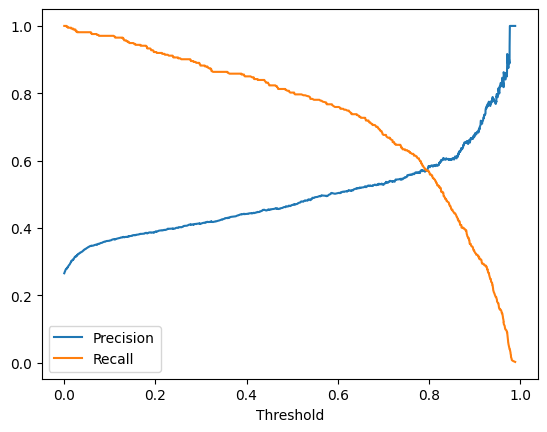

In [ ]:
y_probs = best_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

Как мы видим, будет сложности достичь баланса между точностью и полнотой. Выведем метрики обучения с немного увеличенным порогом


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1033
           1       0.53      0.68      0.59       374

    accuracy                           0.75      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.75      0.76      1407


Confusion Matrix:
[[807 226]
 [121 253]]

ROC-AUC Score: 0.7288451682705996


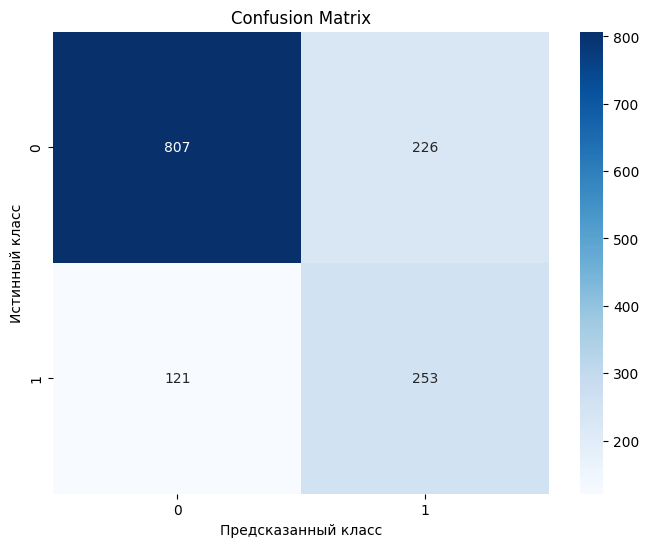

In [ ]:
y_pred_adj = (y_probs >= 0.7).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_adj))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_adj))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_adj))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_adj), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

Как мы видим, даже с увеличенным порогом в сторону 1 класса модель обладает не самой высокой точностью при классификации ушедших клиентов (она часто принимает оставшихся клиентов как ушедших). Это можно объяснить рядом причин, одна из них, это то, что в исходном датасете могло не хватить каких-нибудь важных признаков, например, переезд человека, доходы, количество провайдеров-конкурентов и т.д. XGBoost по умолчанию использует порог 0.5 для бинарной классификации. Если Precision низкий, но Recall высокий, значит, модель слишком "либеральна" и даёт много ложноположительных срабатываний, поэтому порог был немного увеличен с целью получения более хороших предсказаний на 1 классе

Отдельно добавлю, что в данном случае большое количество ложно-положительных предсказаний может быть полезно, поскольку провайдер обладает только своими собственными внутренними данными о клиентах, он не знает их доходов, например, поэтому в данном случае модель можно использовать как инструмент выявления пользователей, которые потенциально могут уйти, и заранее подготовить им индивидуальное предложение

Посмотрим, какие признаки XGBoost посчитала наиболее важными

<Figure size 1200x800 with 0 Axes>

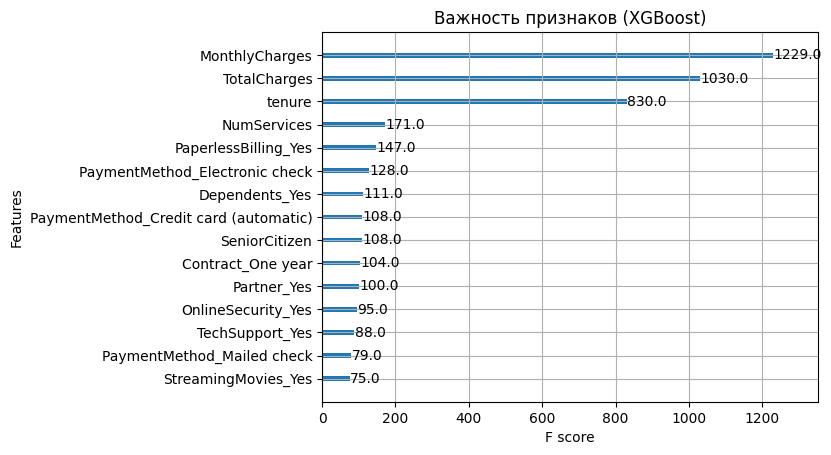

In [ ]:
plt.figure(figsize=(12, 8))
xgb.plot_importance(best_model, max_num_features=15, importance_type='weight')
plt.title('Важность признаков (XGBoost)')
plt.show()

Наиболее важными признаками для модели оказалась месячные траты, суммарные траты, а также количество месяцев обслуживания

## Интерпретация результатов SHAP и LIME

Посчитаем значения SHAP для одного случайного примера из тестовой выборки

In [ ]:
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

 99%|===================| 1389/1407 [00:12<00:00]       

In [ ]:
shap.initjs()
shap_single_plot = shap.force_plot(
    explainer.expected_value,
    shap_values.values[250],
    X_test.iloc[250],
    feature_names=X_test.columns.tolist()
)

HTML(shap_single_plot.html())

Как видно из данной диаграммы, наибольший вклад в удержание данного клиента вносит наличие тарифа на два года, а также наличие онлайн сервисов. В сторону же ухода чашу весов больше склоняют суммарные затраты клиента, равно как и ежемесячные расходы

Аналогично для 100 тестовых примеров, чтобы посмотреть общую тенденцию предсказаний

In [ ]:
shap.initjs()
shap_multi_plot = shap.force_plot(
    explainer.expected_value,
    shap_values.values[:100],
    X_test.iloc[:100]
)

HTML(shap_multi_plot.html())

Посмотрим на важности признаков для алгоритма SHAP

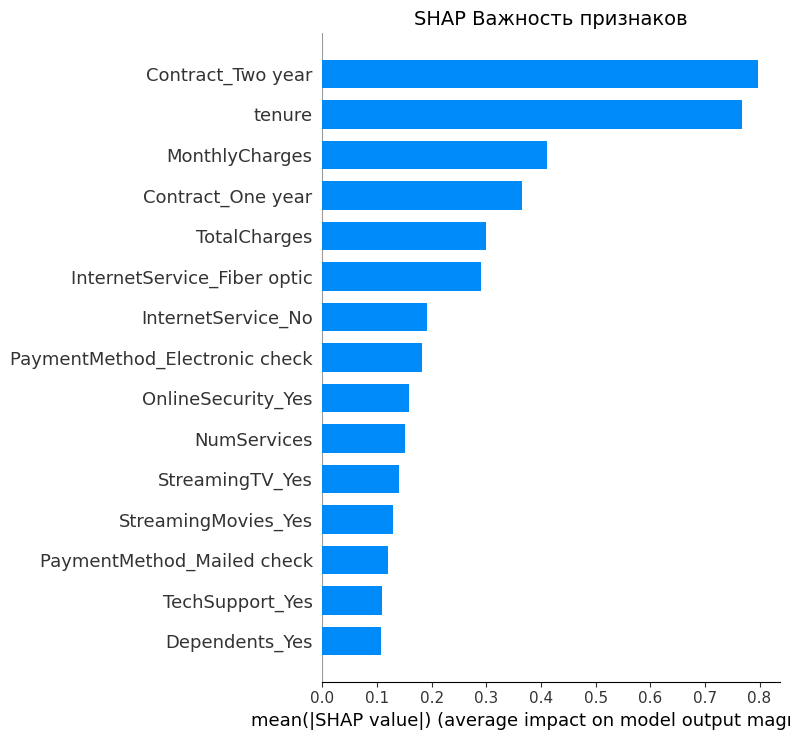

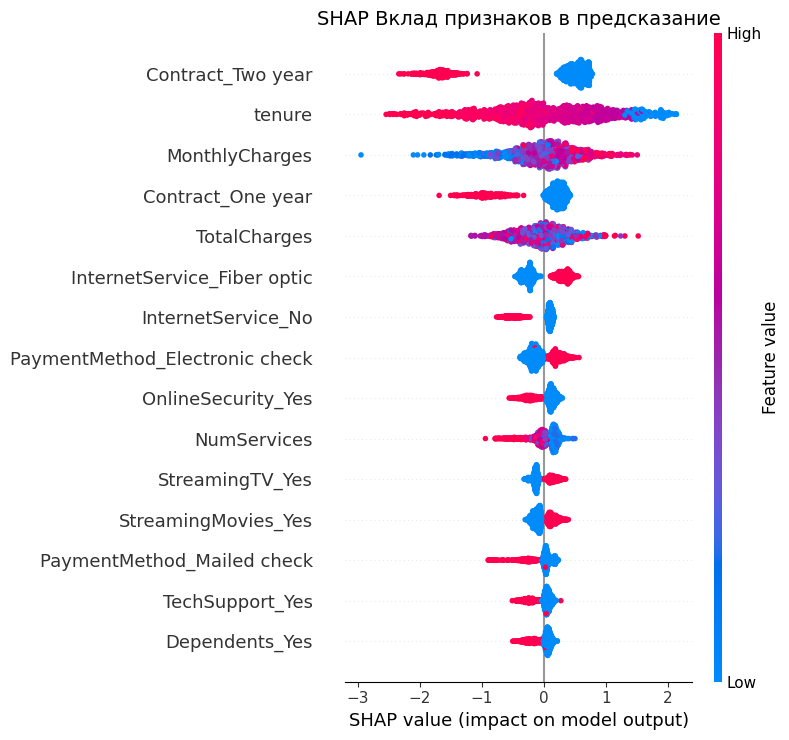

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=15, show=False)
plt.title('SHAP Важность признаков', fontsize=14)
plt.tight_layout()
plt.show()

shap.summary_plot(shap_values, X_test, max_display=15, show=False)
plt.title('SHAP Вклад признаков в предсказание', fontsize=14)
plt.tight_layout()
plt.show()

Мы видим, что как и XGBoost, SHAP выделил признаки **tenure** и **MonthlyCharges** как важные, при этом **TotalCharges** имеет среднюю важность, тогда как для модели это был важный признак, при этом SHAP дополнительно выделил признак **Contract_Two year** как наиболее важный

На графике вклада признаков в предсказания можно оценить, как значения SHAP для каждого признака будут влиять на итоговое предсказание

Возьмем еще один случайный пример из тестовой выборки и применим на нем алгоритм LIME

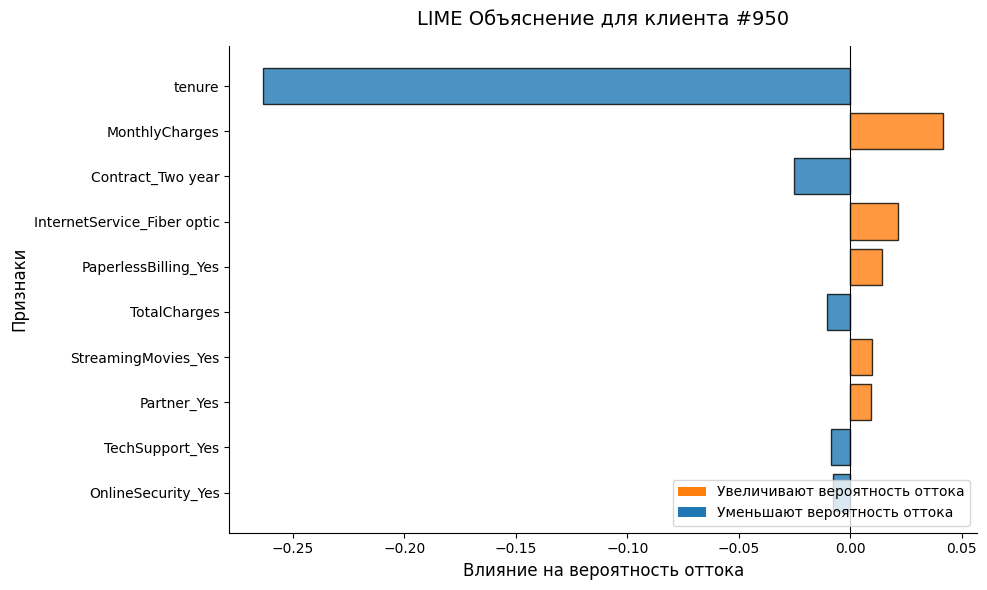

In [ ]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['No Churn', 'Churn'],
    mode='classification',
    verbose=False,
    discretize_continuous=False
)

exp = lime_explainer.explain_instance(
    X_test.iloc[950].values,
    best_model.predict_proba,
    num_features=10
)
exp_list = exp.as_list(label=1)
exp_list.sort(key=lambda x: abs(x[1]), reverse=True)

fig, ax = plt.subplots(figsize=(10, 6))

positive_color = '#ff7f0e'
negative_color = '#1f77b4'

features = []
values = []
colors = []

for feature, value in exp_list:
    features.append(feature)
    values.append(value)
    colors.append(positive_color if value > 0 else negative_color)

features = features[::-1]
values = values[::-1]
colors = colors[::-1]
bars = ax.barh(features, values, color=colors, edgecolor='black', alpha=0.8)

ax.set_xlabel('Влияние на вероятность оттока', fontsize=12)
ax.set_ylabel('Признаки', fontsize=12)
ax.set_title('LIME Объяснение для клиента #950', fontsize=14, pad=15)
ax.axvline(0, color='black', linewidth=0.8)
ax.tick_params(axis='y', labelsize=10)

legend_elements = [
    Patch(facecolor=positive_color, label='Увеличивают вероятность оттока'),
    Patch(facecolor=negative_color, label='Уменьшают вероятность оттока')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.subplots_adjust(left=0.3)
sns.despine()

plt.tight_layout()
plt.show()

In [ ]:
print(exp.show_in_notebook(show_table=True, show_all=False))

None


Видно, что процент того, что клиент уйдет - 75%. На это больше всего оранжевые признаки. Остальные же признаки внесли свою лепту в то, что клиент останется с вероятностью 25%, самым весомым из которых оказался **tenure**

Сохраним результаты предсказаний на тестовой выборке в файл

In [ ]:
submission = pd.DataFrame({
    'id': X_test.index,
    'Churn': y_probs
})

submission.to_csv('churn_probabilities.csv', index=False)

print("\nПервые 5 прогнозов вероятности оттока:")
print(submission.head())


Первые 5 прогнозов вероятности оттока:
     id     Churn
0   974  0.021754
1   619  0.867606
2  4289  0.044020
3  3721  0.190430
4  4533  0.620712
